In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from src.preprocess.functions import get_stats_object

stats = get_stats_object()

In [3]:
len(stats)

20160

In [4]:
from src.preprocess.functions import get_all_downstream_call_counts, get_downstream_probabilities

downstream_counts = get_all_downstream_call_counts(stats)
downstream_probs = get_downstream_probabilities(downstream_counts)

In [8]:
from src.preprocess.functions import sample_downstream_microservices

sampled_microservices = sample_downstream_microservices(downstream_probs, n=7)

In [9]:
from src.preprocess.functions import get_microservice_workload

workloads_for_sampled_microservices = [
    get_microservice_workload(stats, sampled_microservice) 
    for sampled_microservice in sampled_microservices
]


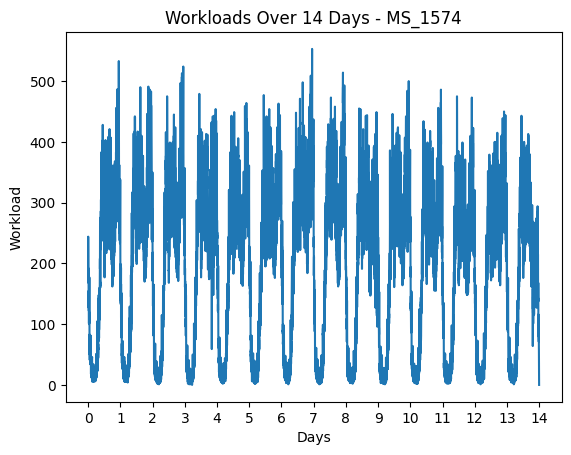

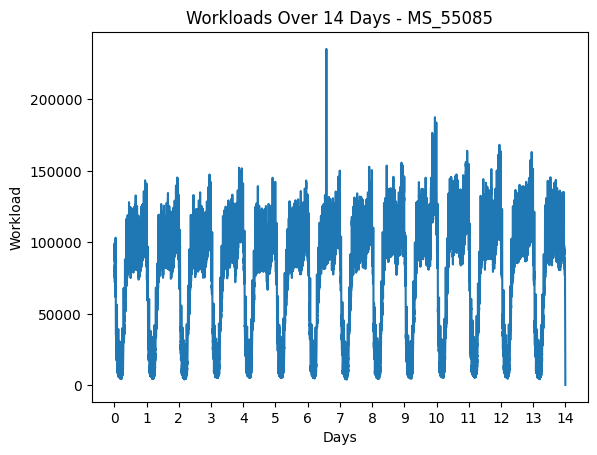

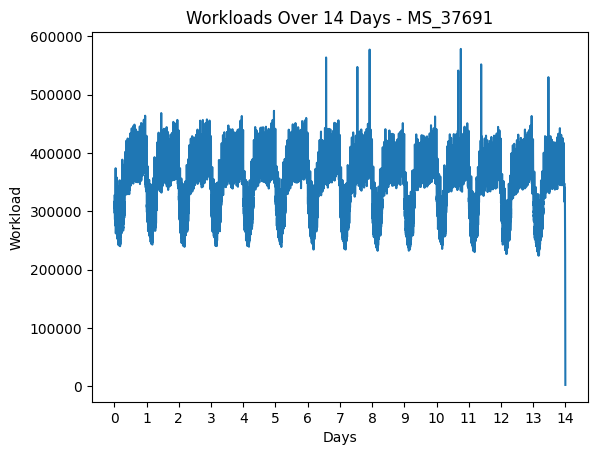

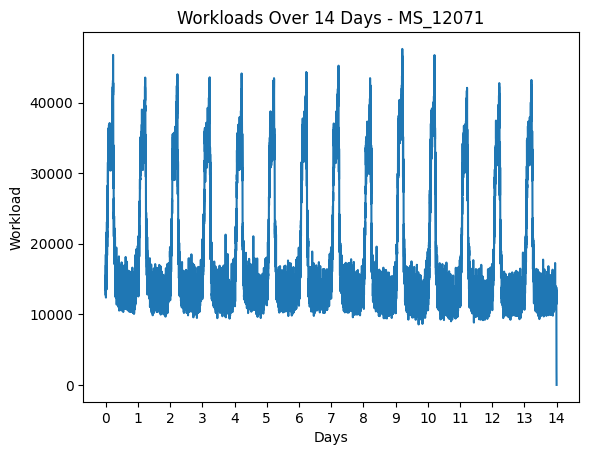

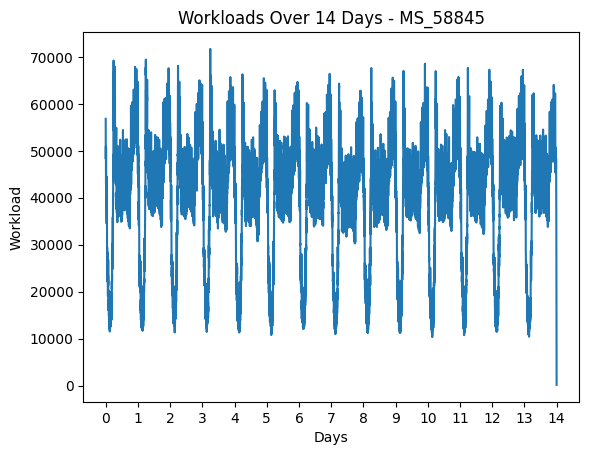

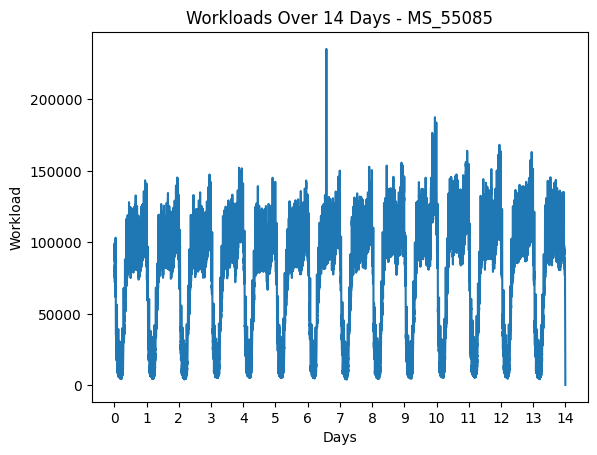

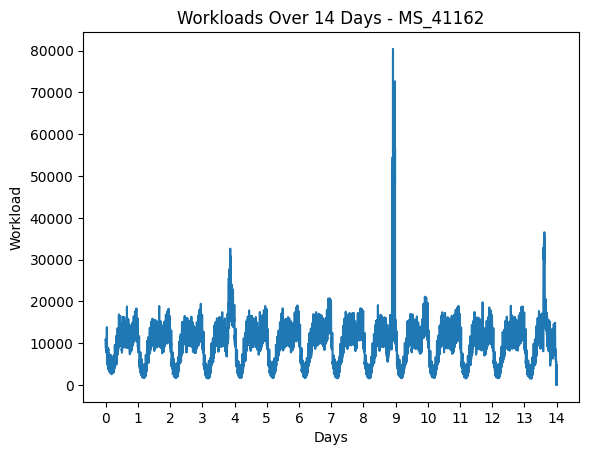

In [10]:
from src.plot import plot_microservice_workload

for i in range(len(workloads_for_sampled_microservices)):
    sampled_microservice = sampled_microservices[i]
    workloads_for_sampled_microservice = workloads_for_sampled_microservices[i]
    plot_microservice_workload(sampled_microservice, workloads_for_sampled_microservice)